In [40]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20, 8))

df = pd.read_csv('data/FIFA_2018_Statistics_sem_NaN_novos_Atributos.csv')
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'Winner', 'Dominant Team',
       'Position Ranking Fifa', 'Already World Champeon'],
      dtype='object')

## Contadores

* Imagine que queremos saber a quantidade de jogos de cada time;
* Qual a média de faltas das seleções por jogo
* A quantidade de gols de cada time

Iremos utilizar a função **value_counts** que retorna um distribuição de frequência dos valores;
* Observe que **value_counts** só é aplicado a Series;

### Quantidade de jogos

In [41]:
df['Team'].value_counts()

France            7
England           7
Croatia           7
Belgium           7
Uruguay           5
Russia            5
Brazil            5
Sweden            5
Switzerland       4
Japan             4
Portugal          4
Mexico            4
Spain             4
Argentina         4
Colombia          4
Denmark           4
Iran              3
Costa Rica        3
Korea Republic    3
Morocco           3
Nigeria           3
Tunisia           3
Poland            3
Serbia            3
Peru              3
Australia         3
Egypt             3
Panama            3
Germany           3
Senegal           3
Iceland           3
Saudi Arabia      3
Name: Team, dtype: int64

## Agrupamento

### Quantidade de faltas

In [44]:
teams = df.groupby('Team')
teams['Ball Possession %'].mean()

Team
Argentina         63.750000
Australia         51.000000
Belgium           52.428571
Brazil            55.600000
Colombia          50.250000
Costa Rica        41.333333
Croatia           55.142857
Denmark           45.250000
Egypt             45.000000
England           53.714286
France            47.857143
Germany           67.000000
Iceland           37.000000
Iran              32.666667
Japan             52.750000
Korea Republic    39.666667
Mexico            54.250000
Morocco           49.666667
Nigeria           46.000000
Panama            39.000000
Peru              51.666667
Poland            49.333333
Portugal          53.750000
Russia            38.800000
Saudi Arabia      58.000000
Senegal           44.000000
Serbia            45.333333
Spain             68.500000
Sweden            39.200000
Switzerland       57.250000
Tunisia           51.000000
Uruguay           48.200000
Name: Ball Possession %, dtype: float64

### Quantidade de gols

In [45]:
teams['Goal Scored'].sum()

Team
Argentina          6
Australia          2
Belgium           16
Brazil             8
Colombia           6
Costa Rica         2
Croatia           14
Denmark            3
Egypt              2
England           12
France            14
Germany            2
Iceland            2
Iran               2
Japan              6
Korea Republic     3
Mexico             3
Morocco            2
Nigeria            3
Panama             2
Peru               2
Poland             2
Portugal           6
Russia            11
Saudi Arabia       2
Senegal            4
Serbia             2
Spain              7
Sweden             6
Switzerland        5
Tunisia            5
Uruguay            7
Name: Goal Scored, dtype: int64

### Um pouco mais sobre a função groupby()

* O atributo **groups** retorna um dicionário com informações sobre as ocorrências (índices) de cada um dos itens passados na lista de seleções.

In [21]:
grupo_team = df.groupby(by = 'Team')
grupo_team.groups

{'Argentina': Int64Index([10, 44, 77, 97], dtype='int64'),
 'Australia': Int64Index([9, 41, 74], dtype='int64'),
 'Belgium': Int64Index([24, 52, 95, 106, 115, 121, 124], dtype='int64'),
 'Brazil': Int64Index([20, 46, 85, 104, 114], dtype='int64'),
 'Colombia': Int64Index([28, 63, 91, 110], dtype='int64'),
 'Costa Rica': Int64Index([16, 47, 87], dtype='int64'),
 'Croatia': Int64Index([14, 45, 79, 102, 119, 122, 127], dtype='int64'),
 'Denmark': Int64Index([13, 40, 72, 103], dtype='int64'),
 'Egypt': Int64Index([2, 33, 67], dtype='int64'),
 'England': Int64Index([27, 58, 94, 111, 117, 123, 125], dtype='int64'),
 'France': Int64Index([8, 42, 73, 96, 113, 120, 126], dtype='int64'),
 'Germany': Int64Index([18, 56, 81], dtype='int64'),
 'Iceland': Int64Index([11, 49, 78], dtype='int64'),
 'Iran': Int64Index([5, 38, 70], dtype='int64'),
 'Japan': Int64Index([29, 60, 88, 107], dtype='int64'),
 'Korea Republic': Int64Index([23, 54, 80], dtype='int64'),
 'Mexico': Int64Index([19, 55, 82, 105], d

* Se nós percorremos o grupo_team, poderemos ver que é guardado um DataFrame para cada seleção.
* Assim, podemos fazer uma estatística por cada time usando a função describe()

In [33]:
for team, team_df in grupo_team:
    print(team)
    print(team_df[['Goal Scored', 'Ball Possession %', 'Attempts', 'Fouls Committed']].describe().round(2))

Argentina
       Goal Scored  Ball Possession %  Attempts  Fouls Committed
count         4.00               4.00      4.00             4.00
mean          1.50              63.75     13.25            13.75
std           1.29               6.55      8.54             2.50
min           0.00              58.00      8.00            10.00
25%           0.75              58.75      8.75            13.75
50%           1.50              62.50      9.50            15.00
75%           2.25              67.50     14.00            15.00
max           3.00              72.00     26.00            15.00
Australia
       Goal Scored  Ball Possession %  Attempts  Fouls Committed
count         3.00                3.0      3.00             3.00
mean          0.67               51.0     10.67            12.33
std           0.58                2.0      5.77             7.02
min           0.00               49.0      4.00             5.00
25%           0.50               50.0      9.00             9.00
50%  

       Goal Scored  Ball Possession %  Attempts  Fouls Committed
count         3.00               3.00      3.00             3.00
mean          0.67              51.67     10.67            12.33
std           1.15               4.51      7.02             2.52
min           0.00              47.00      4.00            10.00
25%           0.00              49.50      7.00            11.00
50%           0.00              52.00     10.00            12.00
75%           1.00              54.00     14.00            13.50
max           2.00              56.00     18.00            15.00
Poland
       Goal Scored  Ball Possession %  Attempts  Fouls Committed
count         3.00               3.00       3.0             3.00
mean          0.67              49.33      10.0            10.33
std           0.58               6.66       1.0             4.04
min           0.00              45.00       9.0             8.00
25%           0.50              45.50       9.5             8.00
50%           1.00

### A função Aggragate()

* Com a função aggragate (agg for short), podemos selecionar as estatísticas descritivas das distribuições.

In [34]:
grupo_team[['Goal Scored', 'Ball Possession %', 'Attempts']].aggregate(['min', 'max', 'sum'])

Goal Scored         Ball Possession %          Attempts      \
                       min max sum               min max  sum      min max   
Team                                                                         
Argentina                0   3   6                58  72  255        8  26   
Australia                0   1   2                49  53  153        4  14   
Belgium                  0   5  16                43  61  367        8  24   
Brazil                   1   2   8                47  66  278       13  26   
Colombia                 1   3   6                41  57  201        4  14   
Costa Rica               0   2   2                34  50  124        4  14   
Croatia                  1   3  14                42  62  386       11  22   
Denmark                  0   1   3                38  49  181        5  15   
Egypt                    0   1   2                39  53  135        8  13   
England                  0   6  12                46  59  376       11  17   
France                   0   4  14                39  62  335        8  19   
Germany                  0   2   2                60  71  201       16  26   
Iceland                  0   1   2                28  42  111        9  17   
Iran                     0   1   2                30  36   98        5   8   
Japan                    0   2   6                44  59  211        7  14   
Korea Republic           0   2   3                30  48  119        5  17   
Mexico                   0   2   3                40  65  217       12  19   
Morocco                  0   2   2                32  64  149        6  16   
Nigeria                  0   2   3                34  58  138        9  16   
Panama                   0   1   2                36  42  117        6   9   
Peru                     0   2   2                47  56  155        4  18   
Poland                   0   1   2                45  57  148        9  11   
Portugal                 1   3   6                39  68  215        8  20   
Russia                   0   5  11                25  47  194        3  13   
Saudi Arabia             0   2   2                53  61  174        6  22   
Senegal                  0   2   4                43  46  132        8  14   
Serbia                   0   1   2                42  50  136       10  12   
Spain                    1   3   7                61  75  274       12  25   
Sweden                   0   3   6                29  52  196        7  15   
Switzerland              0   2   5                48  63  229        6  20   
Tunisia                  1   2   5                41  64  153        6  15   
Uruguay                  0   3   7                39  57  241        6  17   

                     
                sum  
Team                 
Argentina        53  
Australia        32  
Belgium         106  
Brazil          103  
Colombia         39  
Costa Rica       28  
Croatia         115  
Denmark          40  
Egypt            29  
England          96  
France           82  
Germany          67  
Iceland          36  
Iran             21  
Japan            42  
Korea Republic   33  
Mexico           57  
Morocco          35  
Nigeria          39  
Panama           23  
Peru             32  
Poland           30  
Portugal         52  
Russia           46  
Saudi Arabia     36  
Senegal          30  
Serbia           32  
Spain            70  
Sweden           55  
Switzerland      56  
Tunisia          36  
Uruguay          61

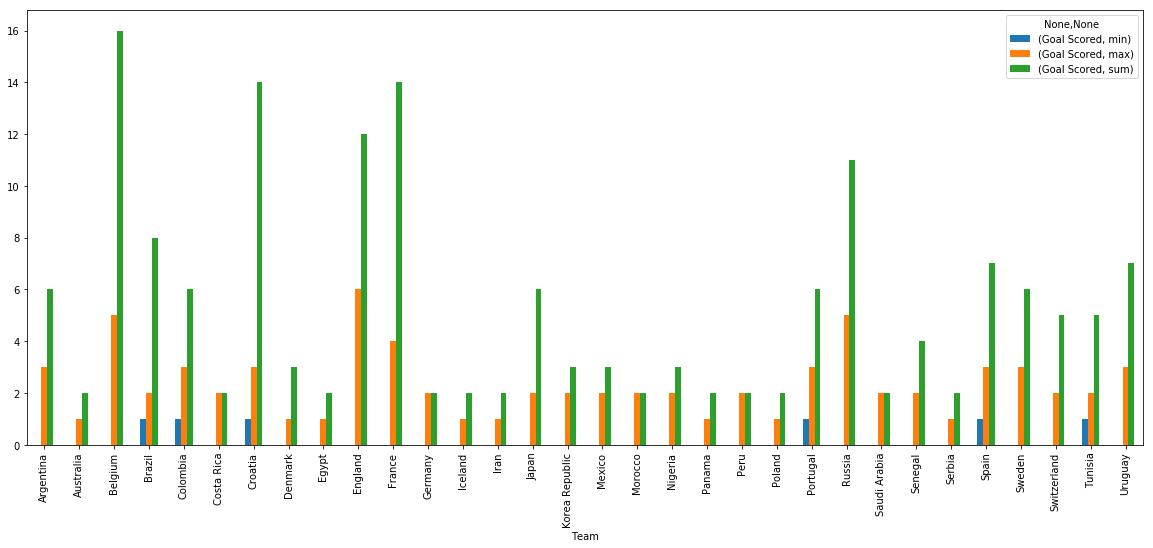

In [46]:
dados = grupo_team[['Goal Scored']].aggregate(['min', 'max', 'sum'])
dados.plot.bar()